# DABI PROJECT

### Import Libraries 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Function to load JSON data from a file
def load_json_data(filename):
    data = []
    with open(filename) as f:
        for line in f:
            data.append(json.loads(line))
    return data

# Assuming the files are in the current working directory
portfolio_data = load_json_data('portfolio.json')
profile_data = load_json_data('profile.json')
transcript_data = load_json_data('transcript.json')

# Convert the loaded data into pandas DataFrames
portfolio_df = pd.DataFrame(portfolio_data)
profile_df = pd.DataFrame(profile_data)
transcript_df = pd.DataFrame(transcript_data)

# Display the first few rows to verify loading
portfolio_df.head(), profile_df.head(), transcript_df.head()


(   reward                      channels  difficulty  duration     offer_type  \
 0      10       [email, mobile, social]          10       7.0           bogo   
 1      10  [web, email, mobile, social]          10       5.0           bogo   
 2       0          [web, email, mobile]           0       4.0  informational   
 3       5          [web, email, mobile]           5       7.0           bogo   
 4       5                  [web, email]          20      10.0       discount   
 
                                  id  
 0  ae264e3637204a6fb9bb56bc8210ddfd  
 1  4d5c57ea9a6940dd891ad53e9dbe8da0  
 2  3f207df678b143eea3cee63160fa8bed  
 3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
 4  0b1e1539f2cc45b7b9fa7c272da2e1d7  ,
   gender  age                                id became_member_on    income
 0   None  118  68be06ca386d4c31939f3a4f0e3dd783         20170212       NaN
 1      F   55  0610b486422d4921ae7d2bf64640c50b         20170715  112000.0
 2   None  118  38fe809add3b4fcf9315a9694bb96ff5 

### Load Datas

In [3]:
portfolio = []
with open('portfolio.json') as f:
    for line in f:
        portfolio.append(json.loads(line))

profile = []
with open('profile.json') as f:
    for line in f:
        profile.append(json.loads(line))
        
transcript = []
with open('transcript.json') as f:
    for line in f:
        transcript.append(json.loads(line))        

### Display the structure of datasets 

In [4]:
# Display the structure of both datasets to understand their schema
portfolio_structure = {key: type(value) for key, value in portfolio[0].items()}
profile_structure = {key: type(value) for key, value in profile[0].items()}
transcript_structure = {key: type(value) for key, value in transcript[0].items()}

portfolio_structure, profile_structure, transcript_structure

({'reward': int,
  'channels': list,
  'difficulty': int,
  'duration': float,
  'offer_type': str,
  'id': str},
 {'gender': NoneType,
  'age': int,
  'id': str,
  'became_member_on': str,
  'income': NoneType},
 {'person': str, 'event': str, 'value': dict, 'time': int})

### Portfolio Data Sample
* offer_type: Type of the offer, e.g., 'bogo'.
* difficulty: Difficulty to complete the offer for reward.
* duration: Duration of the offer in days.
* reward: Reward for completing the offer.
* channels: Channels through which the offer was sent.

### Profile Data Sample
* gender: Gender of the user. Some entries are None, indicating missing data.
* age: Age of the user. Entries with age 118 likely indicate missing or placeholder data.
* id: Unique identifier of the user.
* became_member_on: Date when the user became a member, in 'YYYYMMDD' format.
* income: Income of the user. Some entries are None, indicating missing data.

In [11]:
# Convert profile data to DataFrame for cleaning
profile_df = pd.DataFrame(profile)

# Handle missing values: Replace 'None' with NaN for further processing
profile_df.replace([None], [pd.NA], inplace=True)

# Convert 'became_member_on' to datetime
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')

age_118_rows = profile_df[profile_df['age'] == 118]
print(missing_values) # Age 118 rows all have missing info in income and gender. Therefore remove them.

# Remove rows where age is 118
profile_df = profile_df[profile_df['age'] != 118]

# Display the first few rows to verify rows are removed
print(profile_df.head())


       income  gender
0        True    True
2        True    True
4        True    True
6        True    True
7        True    True
9        True    True
10       True    True
11       True    True
17       True    True
23       True    True
26       True    True
36       True    True
39       True    True
44       True    True
45       True    True
54       True    True
56       True    True
57       True    True
80       True    True
84       True    True
96       True    True
103      True    True
104      True    True
108      True    True
121      True    True
122      True    True
128      True    True
143      True    True
169      True    True
172      True    True
175      True    True
194      True    True
198      True    True
213      True    True
215      True    True
221      True    True
235      True    True
253      True    True
263      True    True
294      True    True
301      True    True
310      True    True
313      True    True
323      True    True
329      T

In [13]:
# Convert portfolio data to DataFrame for examination and potential cleaning
portfolio_df = pd.DataFrame(portfolio)

# Check for missing values and data types
portfolio_info = {
    "missing_values": portfolio_df.isnull().sum(),
    "data_types": portfolio_df.dtypes
}

portfolio_info

{'missing_values': reward        0
 channels      0
 difficulty    0
 duration      0
 offer_type    0
 id            0
 dtype: int64,
 'data_types': reward          int64
 channels       object
 difficulty      int64
 duration      float64
 offer_type     object
 id             object
 dtype: object}

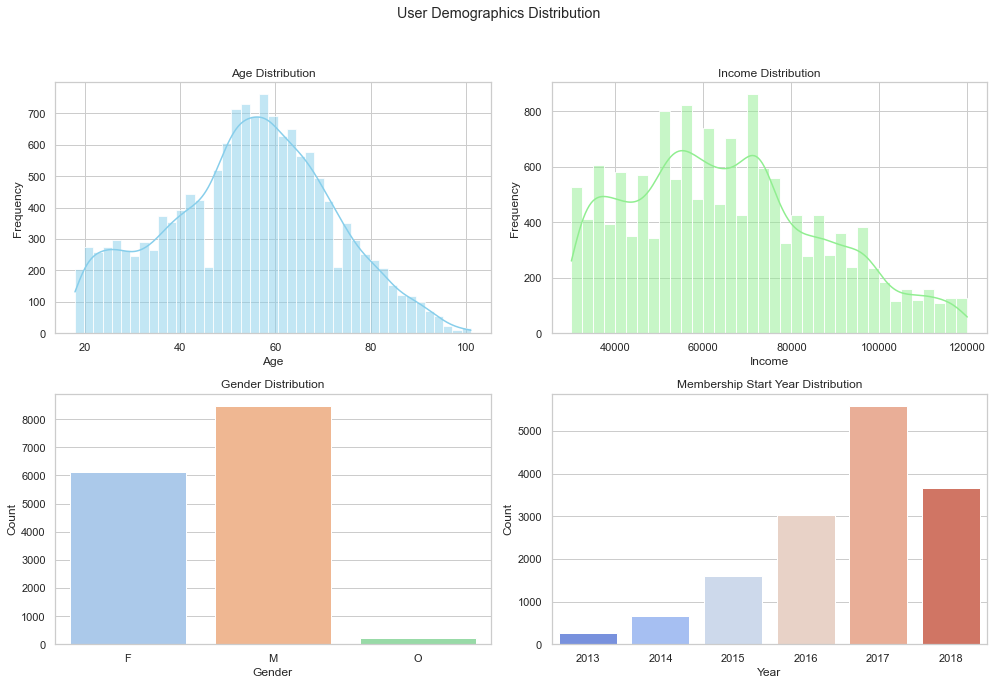

In [12]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('User Demographics Distribution')

# Plot the distribution of age
sns.histplot(data=profile_df, x='age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of income
sns.histplot(data=profile_df, x='income', kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Income Distribution')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')

# Plot the gender distribution
sns.countplot(data=profile_df, x='gender', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Plot the distribution of membership start year
profile_df['membership_year'] = profile_df['became_member_on'].dt.year
sns.countplot(data=profile_df, x='membership_year', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Membership Start Year Distribution')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Portofolio


In [14]:
portfolio_df = pd.DataFrame(portfolio)

portfolio_df['difficulty'] = portfolio_df['difficulty'].astype(float)
portfolio_df['duration'] = portfolio_df['duration'].astype(float)
portfolio_df['reward'] = portfolio_df['reward'].astype(float)

# To expand 'channels' into separate columns
for channel in ['email', 'mobile', 'social', 'web']:
    portfolio_df[channel] = portfolio_df['channels'].apply(lambda x: int(channel in x))

# Drop the original 'channels' var
portfolio_df.drop(columns=['channels'], inplace=True)


portfolio_df.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [15]:
# Summaries for Portofolio df:
summary_stats_portfolio = portfolio_df.describe()
channels_summary = portfolio_df[['email', 'mobile', 'social', 'web']].sum()

summary_stats_portfolio, channels_summary


(          reward  difficulty   duration  email     mobile     social  \
 count  10.000000   10.000000  10.000000   10.0  10.000000  10.000000   
 mean    4.200000    7.700000   6.500000    1.0   0.900000   0.600000   
 std     3.583915    5.831905   2.321398    0.0   0.316228   0.516398   
 min     0.000000    0.000000   3.000000    1.0   0.000000   0.000000   
 25%     2.000000    5.000000   5.000000    1.0   1.000000   0.000000   
 50%     4.000000    8.500000   7.000000    1.0   1.000000   1.000000   
 75%     5.000000   10.000000   7.000000    1.0   1.000000   1.000000   
 max    10.000000   20.000000  10.000000    1.0   1.000000   1.000000   
 
              web  
 count  10.000000  
 mean    0.800000  
 std     0.421637  
 min     0.000000  
 25%     1.000000  
 50%     1.000000  
 75%     1.000000  
 max     1.000000  ,
 email     10
 mobile     9
 social     6
 web        8
 dtype: int64)

##### Summary Statistics
* The mean reward offered across all promotions is 4.2, with a standard deviation of 3.58, indicating variability in the rewards offered.
* Difficulty levels have a mean of 7.7 with a wider spread (std: 5.83), showing that the amount customers need to spend to benefit from offers varies significantly.
* The duration of offers averages 6.5 days, with promotions ranging from 3 to 10 days.
* Offers are fairly distributed among BOGO (40%), discount (40%), and informational (20%), indicating a balanced mix of offer types.

##### Distributions and Counts
* The reward distribution is skewed, with some offers providing high rewards.
* Difficulty shows a broad distribution, reflecting a range of spending thresholds required to qualify for offers.
* The duration histogram indicates that most offers last around 7 to 10 days, with a few shorter-duration offers.
* The count plots for BOGO, discount, and informational offers confirm the balanced approach in offer types, with each type of offer being fairly represented.

##### Channel Usage
* All offers were communicated via email (100%). Hence the col can be removed.
* Mobile was the next most common channel, used in 90% of the offers.
* Social media and web were also prominently used, with 60% and 80% utilization, respectively, indicating a multi-channel strategy to engage customers.

In [17]:
# Remove email col from the portofolio df
portfolio_df.drop(columns=['email'], inplace=True)

#### Plots for Portofolio

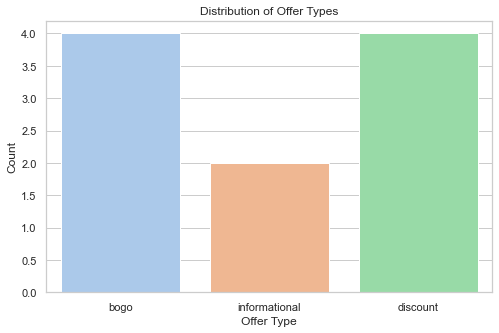

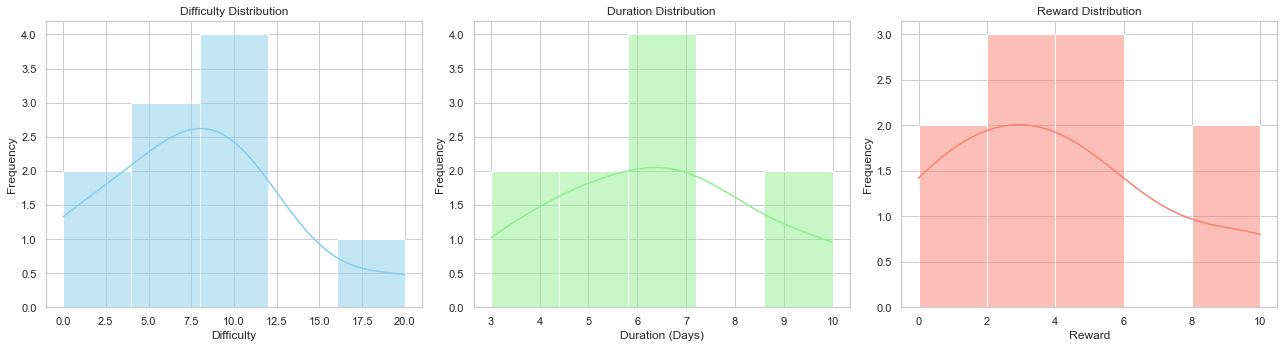

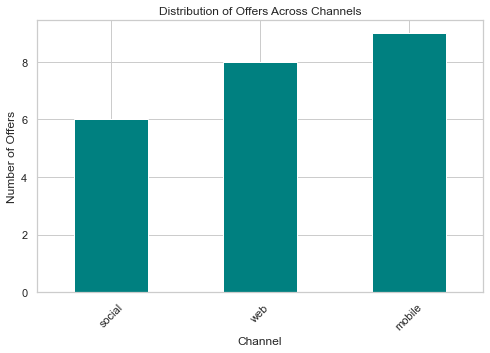

In [19]:
sns.set(style="whitegrid")

# 1. Offer Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=portfolio_df, x='offer_type', palette='pastel')
plt.title('Distribution of Offer Types')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.show()

# 2. Difficulty, Duration, and Reward Analysis
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(portfolio_df['difficulty'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Difficulty Distribution')
ax[0].set_xlabel('Difficulty')
ax[0].set_ylabel('Frequency')

sns.histplot(portfolio_df['duration'], kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Duration Distribution')
ax[1].set_xlabel('Duration (Days)')
ax[1].set_ylabel('Frequency')

sns.histplot(portfolio_df['reward'], kde=True, ax=ax[2], color='salmon')
ax[2].set_title('Reward Distribution')
ax[2].set_xlabel('Reward')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Channel Distribution
channels_count = portfolio_df[['mobile', 'social', 'web']].sum().sort_values()
plt.figure(figsize=(8, 5))
channels_count.plot(kind='bar', color='teal')
plt.title('Distribution of Offers Across Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.show()

### Potential variables to be created:

* Offer Complexity: combining difficulty and duration to reflect the overall complexity or commitment required for an offer. This could help in understanding which complexity levels are most appealing to different segments.

* Offer Appeal: Calculate an appeal score based on the ratio of reward to difficulty, possibly adjusted by duration, to gauge the attractiveness of offers.

* Channel Count: The number of channels used to distribute each offer, which could indicate the offer's visibility or reach.


* Membership Tenure: Calculate the tenure of membership in days or years from the became_member_on field until a fixed date or today. Longer tenure may indicate higher loyalty or engagement levels.

* Age Group: Categorize customers into age groups (e.g., 18-25, 26-35, etc.).

* Income Bracket: categorizing income into brackets (e.g., Low, Medium, High) could help in understanding purchasing power and preferences.


* Engagement Level: Based on transaction data (if available from transcript), you could categorize users into low, medium, and high engagement levels based on the frequency of transactions or interactions with offers.


* Offer Response Rate by Type: For each customer, calculate the response rate (offers completed/offers received) for each offer type. 

* Personalized Offer Complexity Preference: For each customer, you could calculate an average preferred complexity of offers they complete, providing insights into what kind of offers are most likely to be accepted by different segments.

* Segment-Specific Offer Appeal: By segmenting customers first (based on demographic or behavioral data) and then calculating the average offer appeal score within each segment, you can tailor the offer design more effectively to match segment preferences.



### Creating New Variables in Portofolio

#### Offer Complexity


In [21]:
# Create new variables
portfolio_df['offer_complexity'] = portfolio_df['difficulty'] + portfolio_df['duration']
portfolio_df['offer_appeal'] = portfolio_df['reward'] / portfolio_df['difficulty'].replace(0, 1)  # Avoid division by zero
portfolio_df['channel_count'] = portfolio_df[['mobile', 'social', 'web']].sum(axis=1)
portfolio_df.head()

,reward,difficulty,duration,offer_type,id,mobile,social,web,offer_complexity,offer_appeal,channel_count
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,17.0,1.00,2
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,15.0,1.00,3
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1,0,1,4.0,0.00,2
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,12.0,1.00,2
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1,30.0,0.25,1


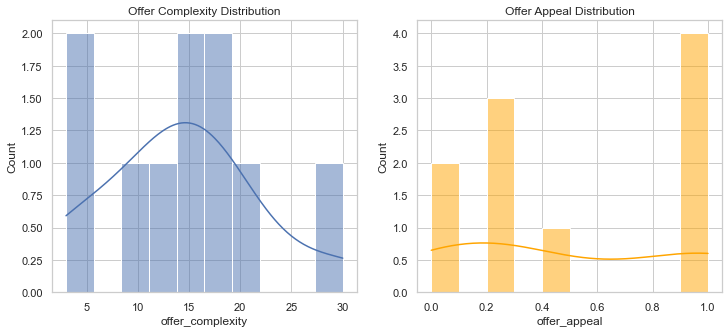

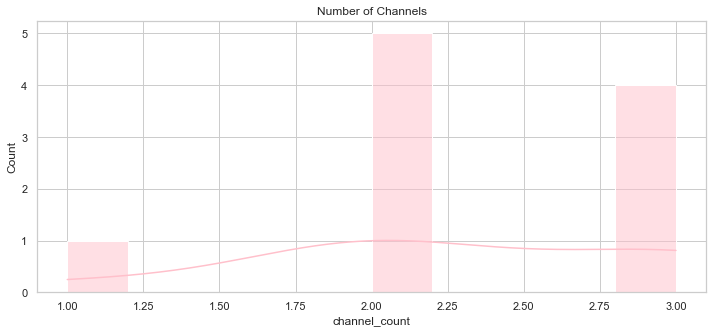

   Channel Count  Frequency
0              1          1
1              2          5
2              3          4


In [23]:
# Perform EDA on new variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(portfolio_df['offer_complexity'], bins=10, kde=True)
plt.title('Offer Complexity Distribution')

plt.subplot(1, 2, 2)
sns.histplot(portfolio_df['offer_appeal'], bins=10, kde=True, color='orange')
plt.title('Offer Appeal Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(portfolio_df['channel_count'], bins=10, kde=True, color='pink')
plt.title('Number of Channels')
plt.show()


channel_count_frequency = portfolio_df['channel_count'].value_counts().sort_index()

# Convert the frequency series to a DataFrame for easier viewing
channel_count_table = channel_count_frequency.reset_index()
channel_count_table.columns = ['Channel Count', 'Frequency']

# Display the table
print(channel_count_table) 


#### Profile variables

In [24]:
# Assuming profile_df is your DataFrame and 'age' is the column you're binning
profile_df = profile_df.dropna(subset=['age', 'income'])  # Drop rows where 'age' or 'income' is NA

profile_df['age_group'] = pd.cut(profile_df['age'], bins=[17, 25, 35, 45, 55, 65, 75, 85, 95, 105], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105'])
profile_df['income_bracket'] = pd.cut(profile_df['income'], bins=[29999, 49999, 69999, 89999, 109999, 129999], labels=['30k-50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k'])

# Ensure 'became_member_on' is in datetime format
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'])

# Assuming 'today' is correctly defined as a datetime object
today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))

# Recalculate 'membership_tenure' if it does not exist
profile_df['membership_tenure'] = (today - profile_df['became_member_on']).dt.days

# Now calculate 'membership_tenure_years'
profile_df['membership_tenure_years'] = (profile_df['membership_tenure'] / 365.25).round(0).astype(int)

# If 'membership_tenure' is no longer needed and you're sure all necessary calculations with it are done
profile_df.drop(columns=['membership_tenure'], inplace=True)

# Display the DataFrame to confirm the changes
profile_df.head()


,gender,age,id,became_member_on,income,membership_year,age_group,income_bracket,membership_tenure_years
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,46-55,110k-130k,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,66-75,90k-110k,7
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,66-75,70k-90k,6
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,56-65,50k-70k,6
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,56-65,50k-70k,6


#### Profile Graphs

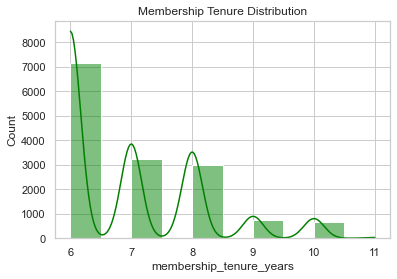

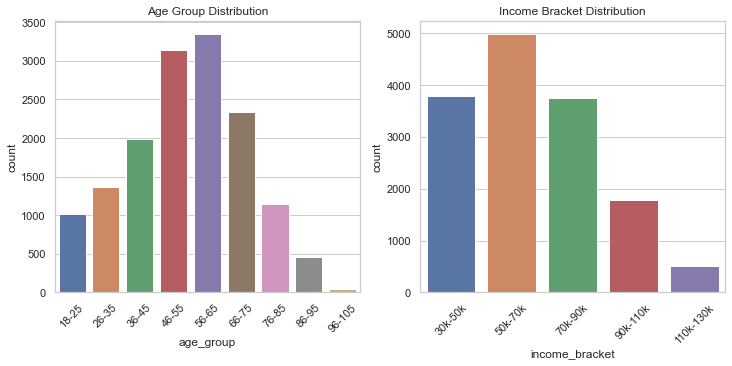

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(profile_df['membership_tenure_years'], bins=10, kde=True, color='green')
plt.title('Membership Tenure Distribution')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=profile_df, x='age_group')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=profile_df, x='income_bracket')
plt.title('Income Bracket Distribution')
plt.xticks(rotation=45)
plt.show()